In [2]:
# Upper Confidence Bound

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2] used 0.0469 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 103.43 MiB


In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3] used 4.7773 MiB RAM in 0.15s, peaked 0.00 MiB above current, total RAM usage 108.21 MiB


In [4]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [4] used 0.9062 MiB RAM in 0.29s, peaked 0.00 MiB above current, total RAM usage 109.12 MiB


In [13]:
# Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / float(numbers_of_selections[i])
            delta_i = math.sqrt(3/2 * math.log(n + 1) / float(numbers_of_selections[i]))
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [13] used 0.0000 MiB RAM in 0.76s, peaked 0.00 MiB above current, total RAM usage 121.95 MiB


In [14]:
total_reward

2358

In [14] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 121.95 MiB


In [15]:
ads_selected

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 0,
 1,
 2,
 3,
 4,
 4,
 5,
 6,
 7,
 8,
 9,
 9,
 0,
 4,
 4,
 9,
 1,
 1,
 2,
 3,
 5,
 6,
 7,
 8,
 8,
 4,
 0,
 1,
 8,
 9,
 4,
 4,
 2,
 3,
 5,
 6,
 7,
 0,
 1,
 8,
 9,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 3,
 5,
 6,
 7,
 0,
 1,
 8,
 9,
 4,
 4,
 4,
 2,
 3,
 5,
 6,
 7,
 0,
 1,
 8,
 9,
 4,
 4,
 0,
 1,
 8,
 9,
 2,
 3,
 5,
 6,
 7,
 7,
 7,
 7,
 7,
 4,
 4,
 7,
 0,
 1,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 8,
 2,
 3,
 5,
 6,
 4,
 8,
 7,
 9,
 0,
 1,
 4,
 2,
 3,
 5,
 6,
 8,
 7,
 7,
 7,
 9,
 4,
 0,
 1,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 7,
 8,
 2,
 3,
 5,
 6,
 9,
 0,
 1,
 4,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 9,
 2,
 3,
 5,
 6,
 4,
 7,
 8,
 0,
 0,
 0,
 1,
 4,
 7,
 0,
 9,
 8,
 2,
 3,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 1,
 1,
 1,
 7,
 0,
 1,
 6,
 9,
 8,
 4,
 7,
 2,
 3,
 5,
 4,
 8,
 0,
 1,
 6,
 9,
 7,
 4,
 7,
 2,
 3,
 5,
 8,
 0,
 1,
 6,
 9,
 4,
 7,
 8,
 8,
 8,
 4,
 2,
 3,
 3,
 3,
 3,
 5,
 0,
 1,
 6,
 9,
 8,
 7,
 4,
 7,
 8,
 3,
 0,
 1,
 6,
 9,
 2,
 5,
 4,
 7,
 8,
 4,
 0,
 1,
 6,
 9,
 3,


In [15] used 0.0117 MiB RAM in 0.15s, peaked 0.00 MiB above current, total RAM usage 121.96 MiB


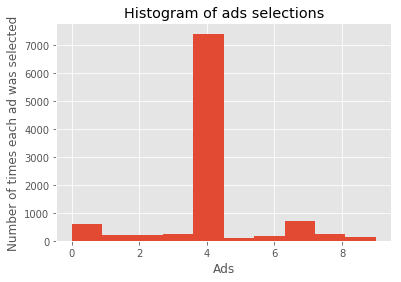

In [8] used 1.5664 MiB RAM in 0.24s, peaked 0.00 MiB above current, total RAM usage 119.93 MiB


In [8]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()